In [1]:
library('org.Mm.eg.db')
library(clusterProfiler)
library(dplyr)
library(tibble)
library(scales)


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welco

In [3]:
clusters =  c('LT-HSC.1','LT-HSC.2','ST-HSC.1','ST-HSC.2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')
df_list=list()
for (c in clusters){
    df = read.table(paste("Cluster",c,".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),header=T)
    # df = df[abs(df$avg_log2FC)>0.2,]
    if (dim(df)[1]>1){
        df['geneName']=rownames(df)
        rownames(df) <- NULL
        df_list <- append(df_list, list(df))
    }
    
}
all_degs=Reduce(rbind,df_list)

all_degs$ENTREZID = mapIds(org.Mm.eg.db, all_degs$geneName, 'ENTREZID', 'SYMBOL')
all_degs$group <- "UP"
all_degs$group[all_degs$avg_log2FC < 0] <- "DN"
all_degs$myCluster <- all_degs$Cluster
head(all_degs)

'select()' returned 1:1 mapping between keys and columns



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,geneName,ENTREZID,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,5.756060e-81,0.8471974,0.346,0.005,1.787429e-76,6.907272e-79,Trim12a,76681,UP
2,5.791799e-64,-1.1198134,0.008,0.442,1.798527e-59,3.475079e-62,Echdc2,52430,DN
3,8.276152e-55,0.5261382,1.000,1.000,2.569993e-50,3.310461e-53,Gm42418,NA,UP
4,4.344522e-39,-0.3104577,1.000,1.000,1.349104e-34,1.303356e-37,Rpl35a,57808,DN
5,1.984737e-32,-0.2391278,1.000,1.000,6.163204e-28,4.763369e-31,Rps29,20090,DN
6,5.918950e-30,-0.2629629,1.000,1.000,1.838012e-25,1.183790e-28,Rps15a,267019,DN


In [8]:
hsc = read.table(paste("Cluster","LT-HSC.1",".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),header=T)
hsc$group <- "UP"
hsc$group[hsc$avg_log2FC < 0] <- "DN"
head(hsc)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Trim12a,5.756060e-81,0.8471974,0.346,0.005,1.787429e-76,6.907272e-79,UP
Echdc2,5.791799e-64,-1.1198134,0.008,0.442,1.798527e-59,3.475079e-62,DN
Gm42418,8.276152e-55,0.5261382,1.000,1.000,2.569993e-50,3.310461e-53,UP
Rpl35a,4.344522e-39,-0.3104577,1.000,1.000,1.349104e-34,1.303356e-37,DN
Rps29,1.984737e-32,-0.2391278,1.000,1.000,6.163204e-28,4.763369e-31,DN
Rps15a,5.918950e-30,-0.2629629,1.000,1.000,1.838012e-25,1.183790e-28,DN


In [9]:
mep = read.table(paste("Cluster","MEP",".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),header=T)
mep$group <- "UP"
mep$group[mep$avg_log2FC < 0] <- "DN"
head(mep)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Echdc2,6.483726e-38,-0.9421003,0.005,0.367,2.013391e-33,1.361582e-35,DN
Gm42418,9.598271e-28,0.5101136,1.000,1.000,2.980551e-23,1.007819e-25,UP
Rpl5,8.494361e-16,0.2436647,1.000,0.996,2.637754e-11,4.776713e-14,UP
Plac8,9.098501e-16,0.6520436,0.958,0.844,2.825358e-11,4.776713e-14,UP
Gm47283,3.629931e-15,-0.6022078,0.099,0.337,1.127203e-10,1.524571e-13,DN
Lgals1,1.791551e-13,-0.8693149,0.476,0.678,5.563304e-09,6.270429e-12,DN


In [14]:
hsc_UP = rownames(hsc[hsc$group=="UP",])
hsc_DN = rownames(hsc[hsc$group=="DN",])
mep_UP = rownames(mep[mep$group=="UP",])
mep_DN = rownames(mep[mep$group=="DN",])

In [22]:
up_dn = intersect(hsc_UP,mep_DN)
up_dn

[1] "Prtn3"

In [23]:
dn_up = intersect(hsc_DN,mep_UP)
dn_up

character(0)

In [24]:
up_none = setdiff(hsc_UP,rownames(mep))
up_none

[1] "Wdfy1"         "Gstp1"         "Lmo2"          "H2-Eb1"       
 [5] "Maf"           "Fads1"         "Apoe"          "Gdpd3"        
 [9] "Tnfsf10"       "Jund"          "Adipor2"       "E230032D23Rik"
[13] "Smim5"         "Psmb8"         "Mettl7a1"      "Tmed5"        
[17] "Ankrd12"       "Wnk1"          "Akap13"        "Tap1"         
[21] "Meg3"          "Clec2d"        "Gse1"          "Stat3"        
[25] "Cyp51"         "Mpl"           "Numa1"         "Angpt1"       
[29] "Atp1a1"        "Aplp2"         "Glg1"          "Rras"         
[33] "Tsc22d3"       "Insig1"        "Arid1b"        "Tagln2"       
[37] "Rb1cc1"        "Ncor1"         "Stat1"         "Hlf"          
[41] "Ly6a"          "Scd2"          "Rfk"           "Vgll4"        
[45] "Eif4b"         "Prr13"         "Ltb"           "Runx1"        
[49] "Kansl1l"       "Pdzk1ip1"      "Ifi27"         "Nrip1"        
[53] "Ly6e"          "Muc13"

In [25]:
dn_none = setdiff(hsc_DN,rownames(mep))
dn_none

[1] "Rps29"    "Rps15a"   "Rpl28"    "Rpl32"    "Rpl37a"   "Rplp1"   
 [7] "Rps12"    "Rps20"    "Rps26"    "Rpl34"    "Fau"      "Rpl36"   
[13] "Rpl37"    "Rpl38"    "Arhgdib"  "S100a11"  "Sem1"     "Sh3bgrl3"
[19] "Snrpe"    "Mrpl54"   "Cox7a2"   "Snrpf"    "Nop10"    "Uqcc2"   
[25] "Mrpl23"   "Ssr4"     "Ndufv3"   "Cox5b"    "Tuba1b"   "Sec61g"  
[31] "Ranbp1"   "Crip1"    "Mpo"

In [26]:
none_up = setdiff(mep_UP,rownames(hsc))
none_up

[1] "Rpl5"    "Plac8"   "Rps7"    "Ifngr1"  "Rpl13a"  "Itga4"   "Zcchc6" 
 [8] "Ube2b"   "Gm17590" "Raf1"    "Ldah"    "Gm42047" "Stom"    "Anapc16"
[15] "Gm11808" "Ccdc86"  "Acss2"   "Car1"    "Ccdc88a" "Jak2"    "Akirin1"
[22] "Mllt10"  "Oat"     "Fam96a"  "Scin"    "Msn"     "Rsu1"    "Hsdl1"  
[29] "Mdn1"    "Myb"     "Zbtb1"   "Cdk19"   "Trib2"   "Tspo2"   "Ogt"    
[36] "Kctd14"  "Tmem230" "Top2b"   "Zfp217"  "Acaa2"   "Dhx40"   "S100a10"
[43] "Pik3ip1" "Atp8a1"  "Arid4a"  "Ptpre"   "Samd14"  "Pabpn1"  "Tspo"   
[50] "Ddx6"    "Smc4"    "Mosmo"   "Abcb4"   "Ehmt2"   "Vim"     "Smap2"  
[57] "Tbcel"   "Letm2"   "Slc14a1" "Tgoln1"  "Jun"     "Patz1"   "Erh"    
[64] "Dnase2a" "Runx3"   "Macf1"   "Aqp1"    "Ttc3"    "Galnt6"  "Gadd45a"
[71] "Npc2"    "Krit1"   "Ppp4r2"  "Spn"     "Ash1l"   "Kdm5a"

In [27]:
none_down = setdiff(mep_DN,rownames(hsc))
none_down

[1] "Txn1"          "Ndufa4"        "Uqcrq"         "Gm35082"      
 [5] "Krtcap2"       "Rpl36al"       "Hist1h1b"      "Slc25a4"      
 [9] "2010107E04Rik" "Atp5l"         "Ldhb"          "Cox8a"        
[13] "Rfc2"          "Ndufb2"        "Dbi"           "Hells"        
[17] "Elane"         "Adgrg1"        "Capza2"        "Atp5j2"       
[21] "Ptpn18"        "Cox7c"         "Myl10"

In [35]:
category = c(
             rep("up_none",length(up_none)),
             rep("dn_none",length(dn_none)),
             rep("none_up",length(none_up)),
             rep("none_dn",length(none_down))
            )
genes = c(
             up_none,
             dn_none,
             none_up,
             none_down
)

In [36]:
df = data.frame(category=category,genes=genes)

In [37]:
head(df)

,category,genes
,<chr>,<chr>
1,up_none,Wdfy1
2,up_none,Gstp1
3,up_none,Lmo2
4,up_none,H2-Eb1
5,up_none,Maf
6,up_none,Fads1


In [38]:
df$ENTREZID = mapIds(org.Mm.eg.db, df$genes, 'ENTREZID', 'SYMBOL')
head(df)

'select()' returned 1:1 mapping between keys and columns



,category,genes,ENTREZID
,<chr>,<chr>,<chr>
1,up_none,Wdfy1,69368
2,up_none,Gstp1,14870
3,up_none,Lmo2,16909
4,up_none,H2-Eb1,14969
5,up_none,Maf,17132
6,up_none,Fads1,76267


In [39]:
aa = function(var,file_name){
    write.table(var,file=file_name,sep=",",row.names=F)
}

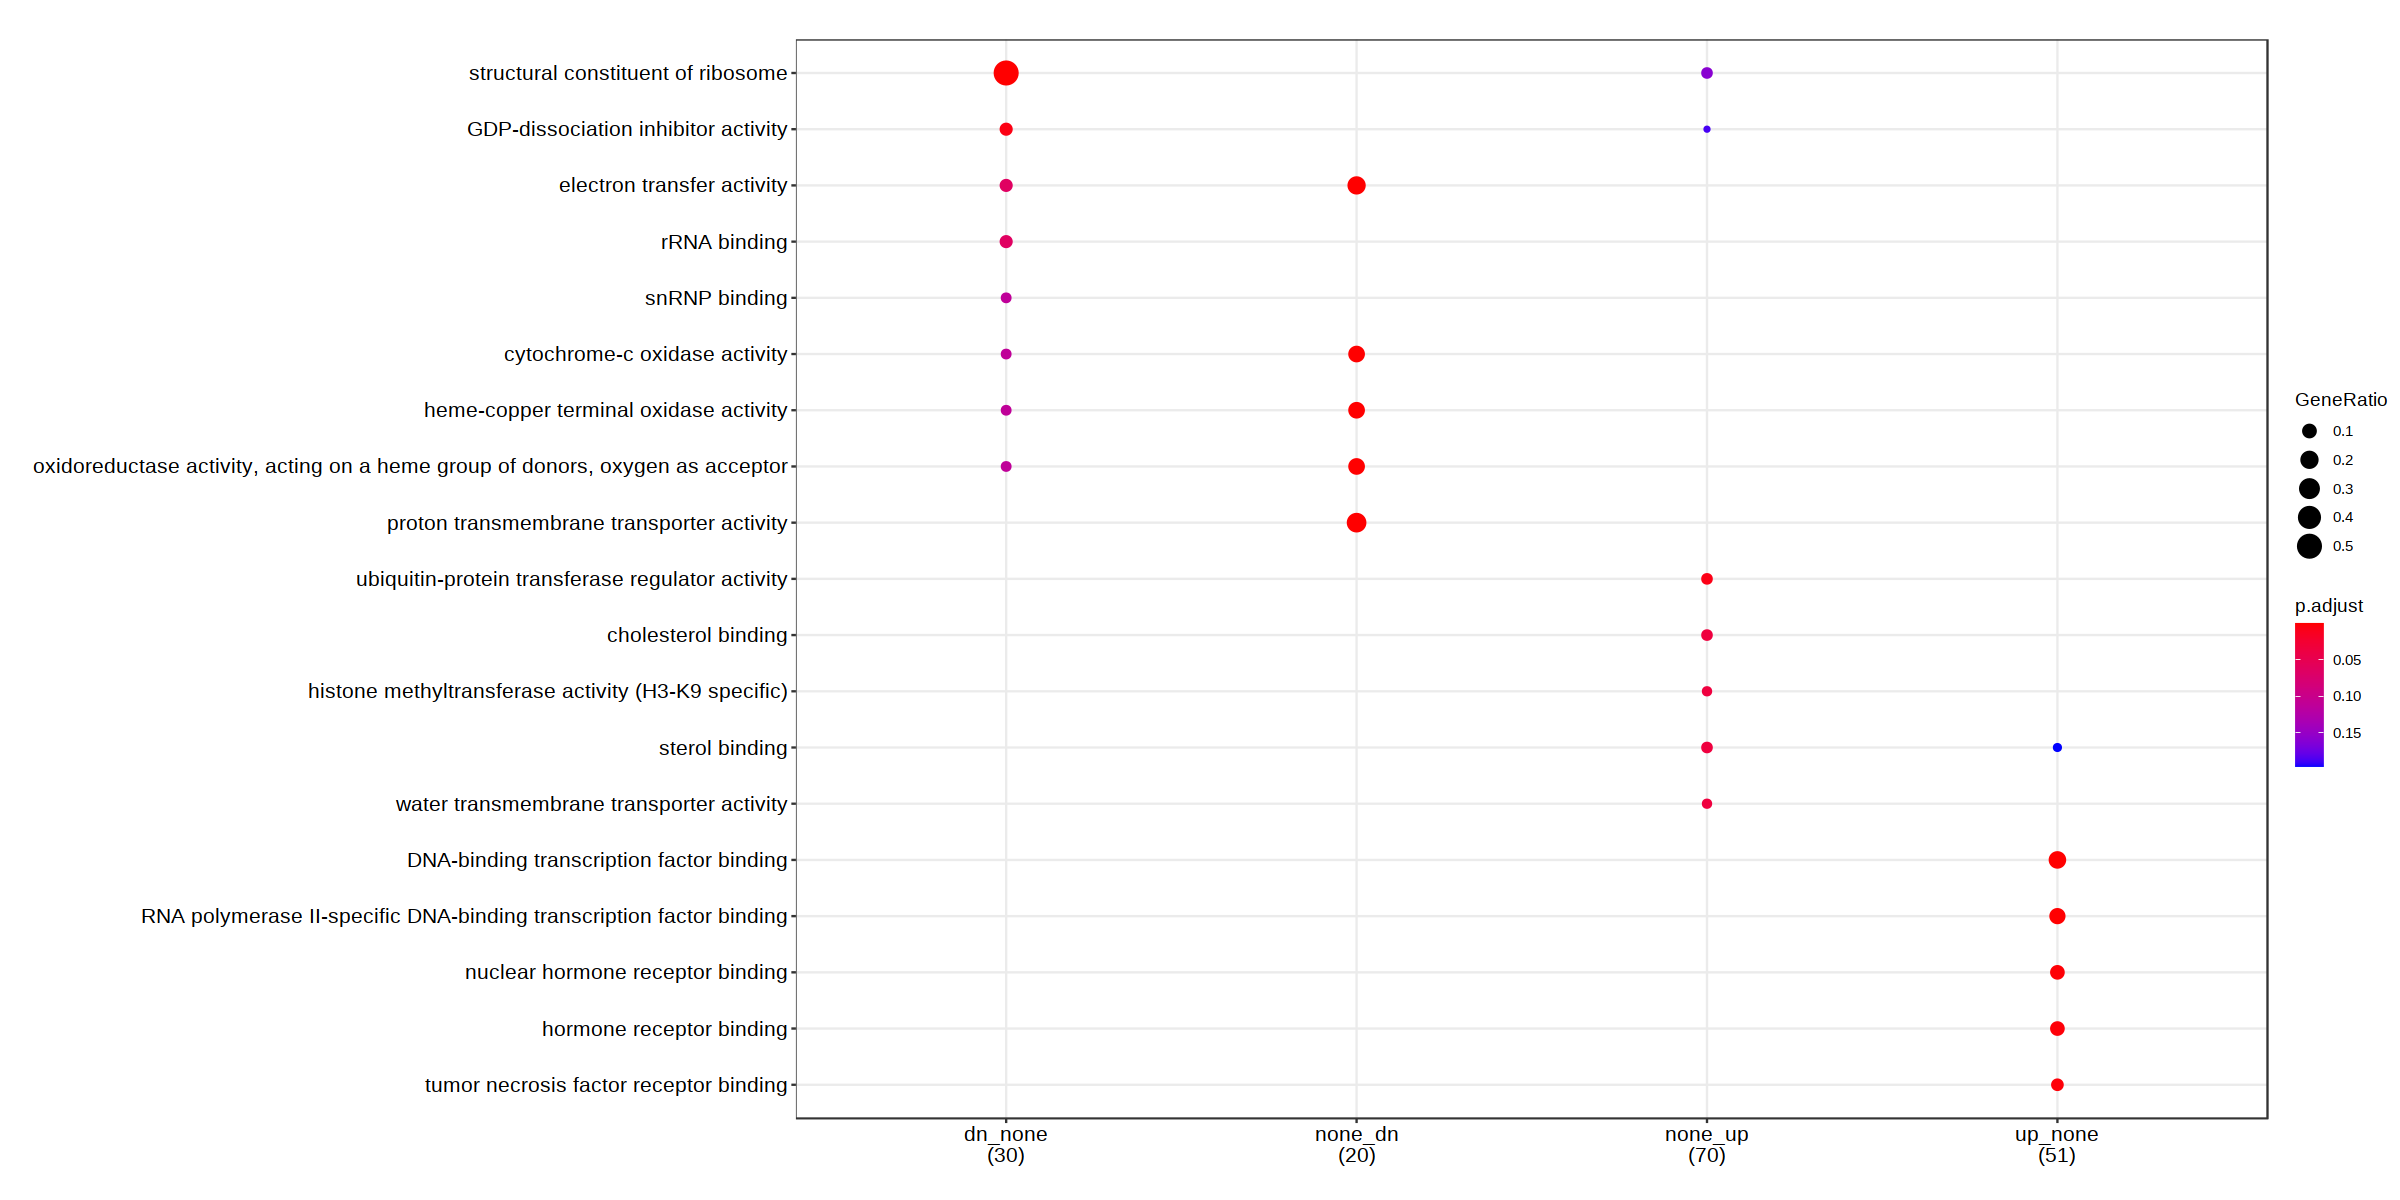

In [40]:
formula_res_MP <- compareCluster(ENTREZID~category, data=df, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="MF",qvalueCutoff=0.5,pvalueCutoff=0.2)
options(repr.plot.width = 10, repr.plot.height = 8)
dotplot(formula_res_MP)
# dotplot(formula_res_MP, x=~Cluster,showCategory=5)
# ggsave("GOMF_per_cluster.pdf",width=14,height=7)
# aa(formula_res_MP@compareClusterResult,"GOMF_per_cluster.csv")

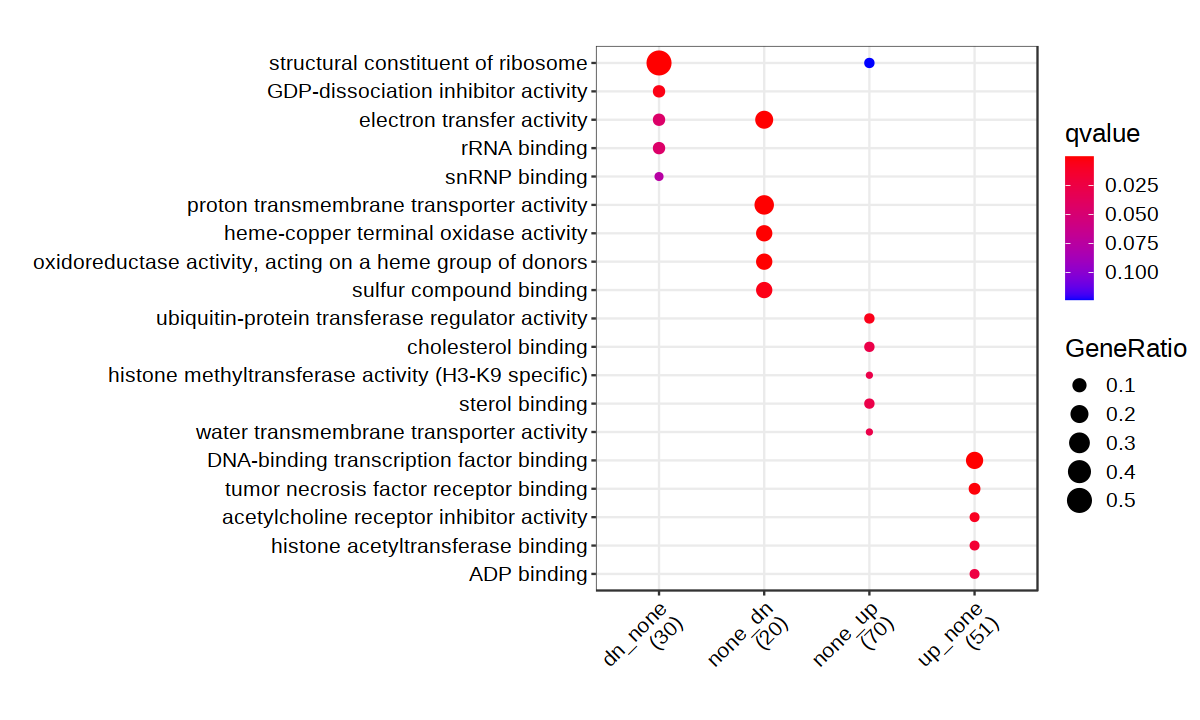

In [50]:
options(repr.plot.width = 10, repr.plot.height = 6)

formula_res_MF2 <- simplify(formula_res_MP, cutoff=0.5, by="p.adjust", select_fun=min)
a=dotplot(formula_res_MF2,showCategory=5,color="qvalue")+
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
print(a)
ggsave("LTHSC1_vs_MEP_GOMF.pdf",width=10,height=6)
aa(formula_res_MP@compareClusterResult,"LTHSC1_vs_MEP_GOMF_per_cluster.csv")

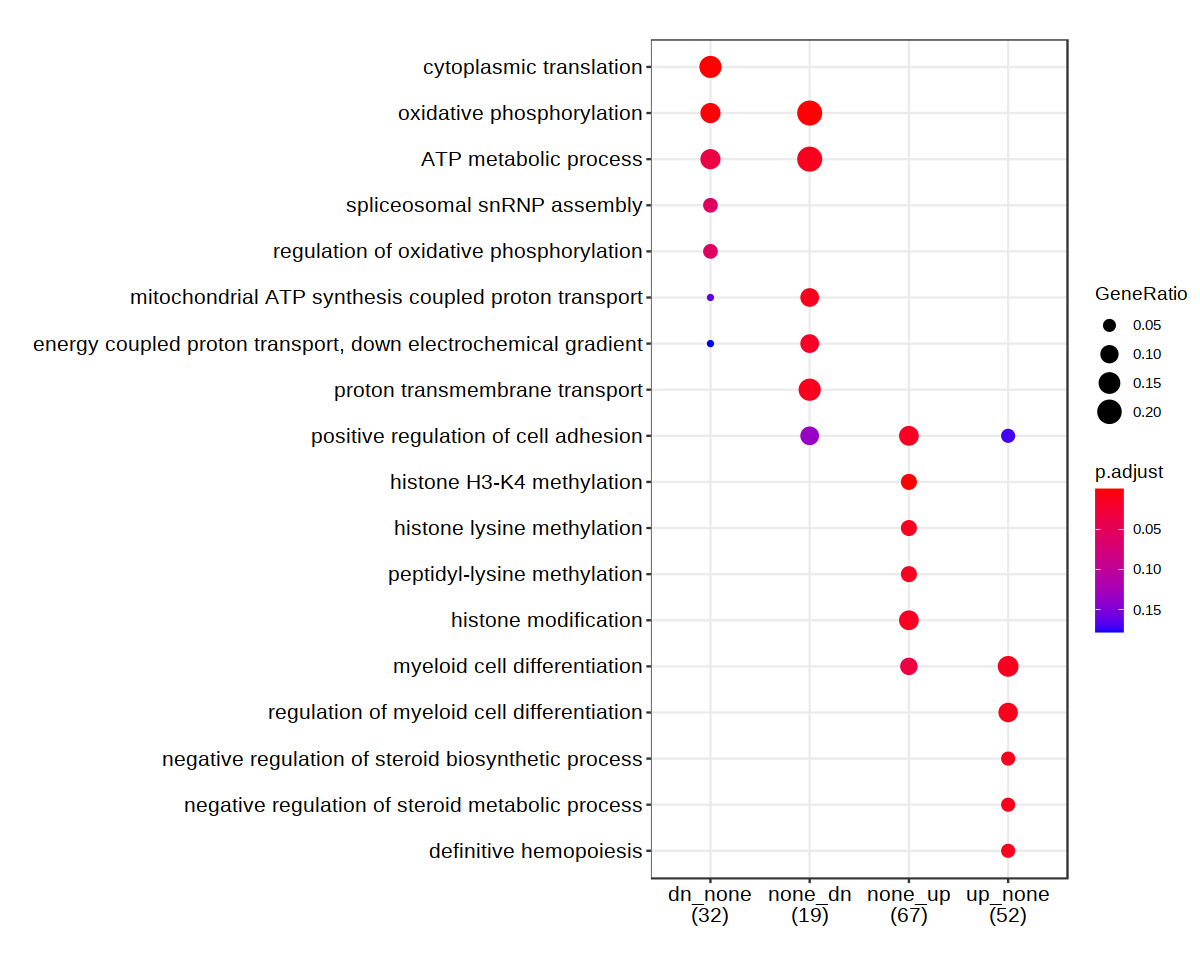

In [45]:
formula_res_BP <- compareCluster(ENTREZID~category, data=df, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="BP",qvalueCutoff=0.5,pvalueCutoff=0.2)
options(repr.plot.width = 10, repr.plot.height = 8)
dotplot(formula_res_BP)

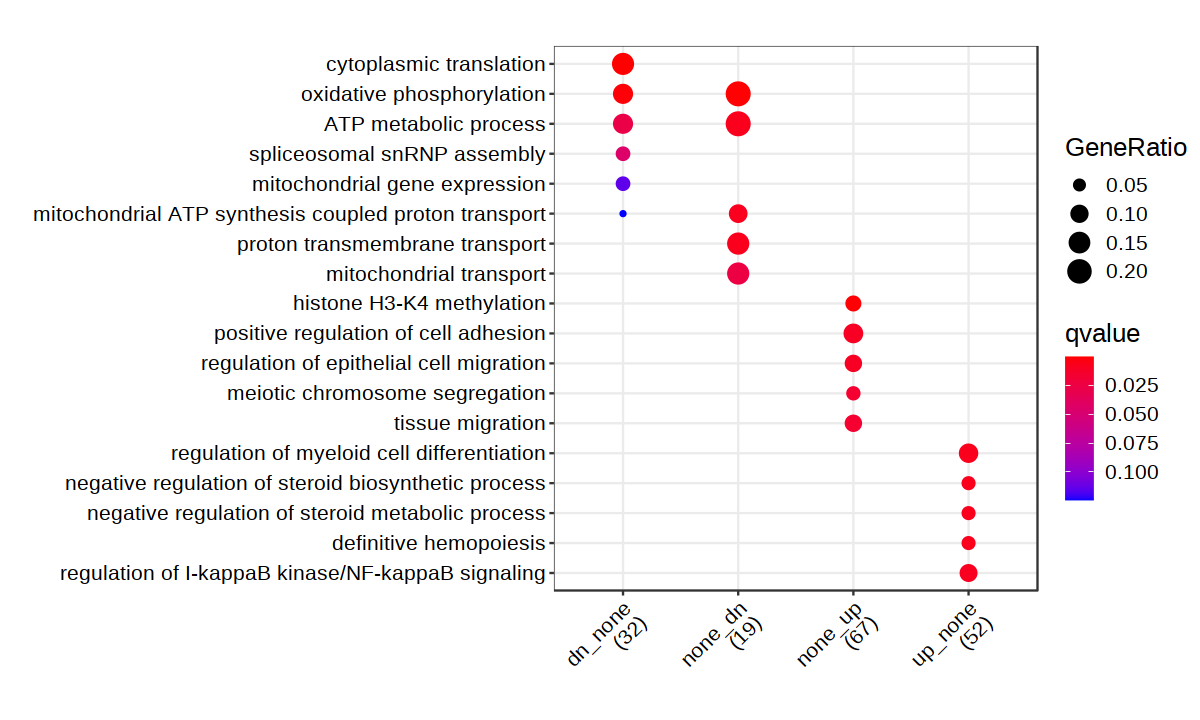

In [51]:
options(repr.plot.width = 10, repr.plot.height = 6)

formula_res_BP2 <- simplify(formula_res_BP, cutoff=0.5, by="p.adjust", select_fun=min)
a=dotplot(formula_res_BP2,showCategory=5,color="qvalue")+
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
print(a)


ggsave("LTHSC1_vs_MEP_GOBP.pdf",width=12,height=6)
aa(formula_res_BP@compareClusterResult,"LTHSC1_vs_MEP_GOBP_per_cluster.csv")

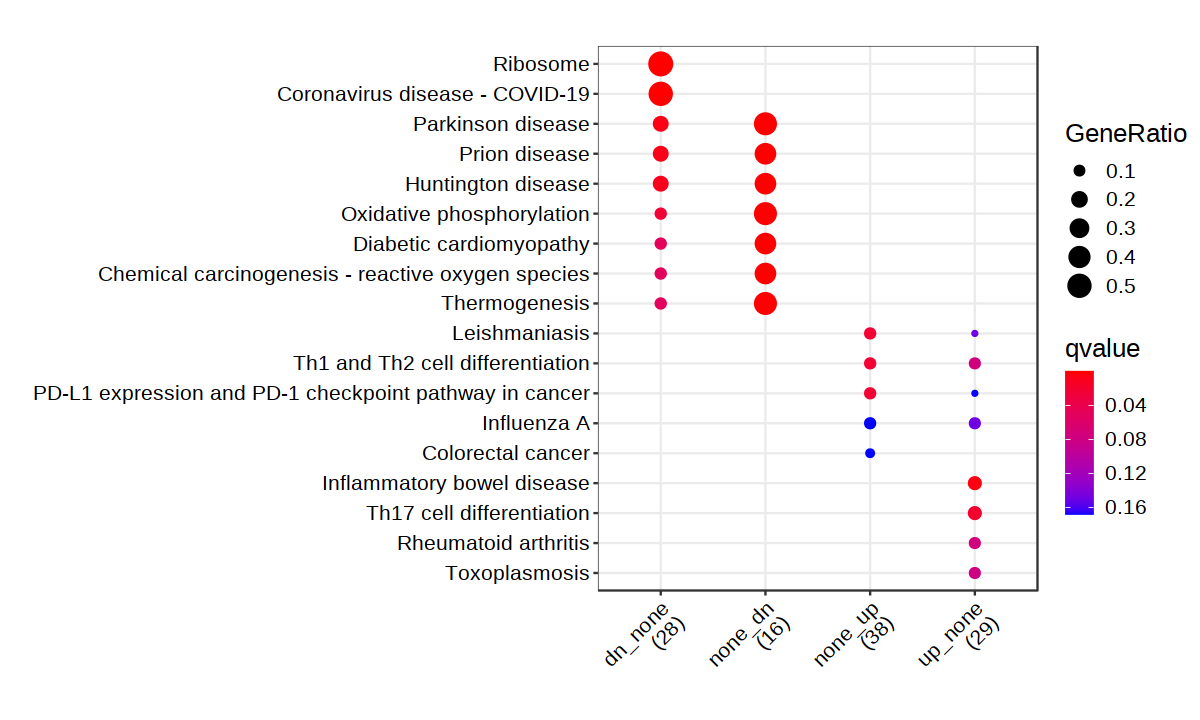

In [53]:
# formula_res_BP <- compareCluster(ENTREZID~category, data=df, fun="enrichGO",
#                                  OrgDb = org.Mm.eg.db,ont="BP",qvalueCutoff=0.5,pvalueCutoff=0.2)
# options(repr.plot.width = 10, repr.plot.height = 8)
# dotplot(formula_res_BP)

formula_res_KEGG <- compareCluster(ENTREZID~category, data=df, fun="enrichKEGG",organism="mmu",qvalueCutoff=0.5,pvalueCutoff=0.2)
aa(formula_res_KEGG@compareClusterResult,"LTHSC1_vs_MEP_KEGG.csv")
a=dotplot(formula_res_KEGG,showCategory=5,color="qvalue")+
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
print (a)
ggsave("LTHSC1_vs_MEP_KEGG.pdf",width=12,height=7)